# Linear Regression
In this Note Book We will try and follow steps for linear regression

## Step 1: Problem statement

In this 

## Step 2: Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib; 
import matplotlib.pyplot as plt

from sklearn import metrics
%matplotlib inline



## Step 3: Importing Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Step 4: Data Analysis

In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Since we want to know the effect of the money spent on adverts on TV, radio and newspaper on sales, 
out Target variable will be sales amd explanatory variables be TV, radio, newspaper

In [6]:
features = ['TV','radio','newspaper']
result = 'sales'

## Step 5: Checking if the data set confirms to the pre-requsites(Assumptions)

### Pre-Requsite 1: The Target Variable should be normally distributed

If we see the mean and median of the Target Variable *(In this case the **sales** column)*, We can notice that the mean and median are pretty close to each other, leading to the conclusion that the Target Variable is normally distributed

### Pre-Requsite 2: There should be a linear relationship between the Target varianble and the explanatory Variables

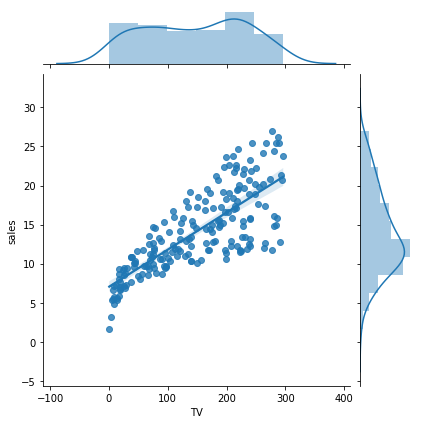

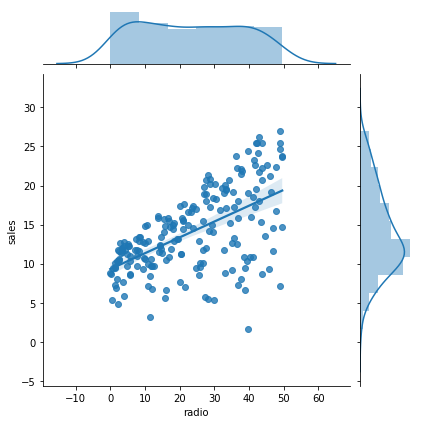

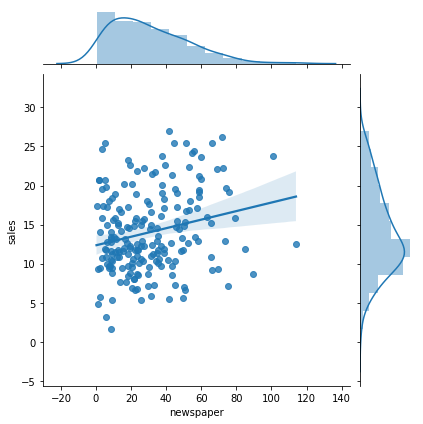

In [7]:
for feature in features:
    sns.jointplot(feature, result, data=data, kind='reg')    

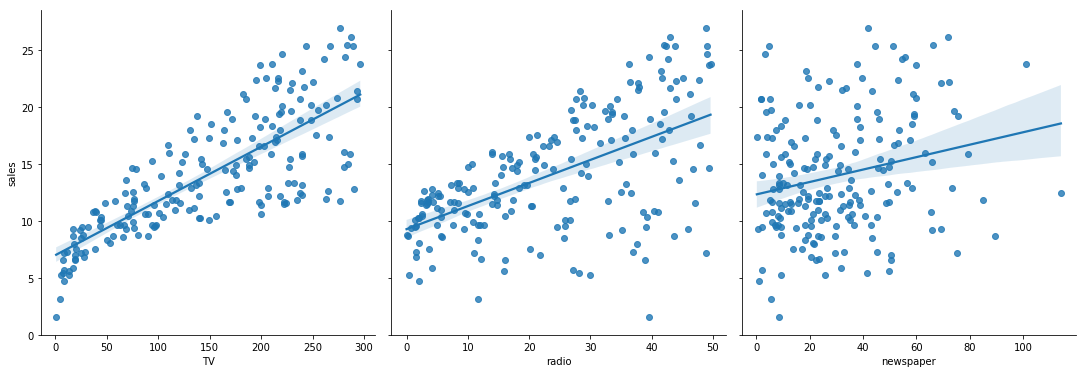

In [8]:
sns.pairplot(data, x_vars=features, y_vars=result, height=5, aspect=1, kind='reg')

It is noticed from the above graphs that there exists a linear relationship between the Target Variable *(In this case the **sales** column)* and the Explanatory Variables(In this case the **newspaper, radio and TV** column(s)).

### Pre-Requsite 3: The Explanatory Variables should not be co-related to each other

In [9]:
data[features].corr() 

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


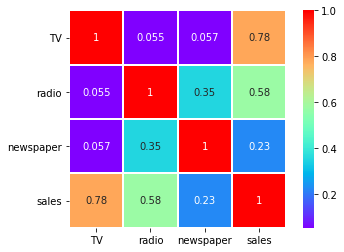

In [10]:
sns.heatmap( data.corr() ,annot =True,linewidths=1,square=True,cmap='rainbow');

It is noticed that the Explanatory Variables(In this case the **newspaper, radio and TV** column(s)) are not correlated to each other. Hence there is no *multicollinearity*

### Pre-Requsite 4: The error terms must have constant variance*(homoscedascity)*.

Since the Target Variable *(In this case the **sales** column)* is normally distributed, the error will also be normally distributed

#### As all Pre-Requisites are fulfilled we can move further

## Step 6: Splitting the data into train and test data

we use  the train_test_split function from sklearn.model_selction package to get the train and test data

In [11]:
from sklearn.model_selection import train_test_split
def split(x, y):
    return train_test_split(x, y, test_size=0.20, random_state=1)
x_train,x_test,y_train,y_test = split(data[features], data[result])

## Step 7: Scaling the data
Many a times the data will be in different units and different scales. To remove the differences caused by units etc we scale the data by using StandardScaler in sklearn.preprocessing package

### Making New Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
feature_scalers = [];
for feature in features:
    scaler = StandardScaler().fit(np.array(x_train[feature]).reshape(len(x_train.index),1))
    feature_scalers.append(scaler)
result_scaler = StandardScaler().fit(np.array(y_train).reshape(len(y_train.index),1))

### Scaling data

In [13]:
x_scaled_train = pd.DataFrame()
x_scaled_test = pd.DataFrame()
y_scaled_train = pd.DataFrame()


for index in np.arange(0,3):
    feature = features[index]
    scaler = feature_scalers[index]
    x_scaled_train[feature] = scaler.transform(np.array(x_train[feature]).reshape(len(x_train.index),1)).flatten()
    x_scaled_test[feature] = scaler.transform(np.array(x_test[feature]).reshape(len(x_test.index),1)).flatten()
y_scaled_train[result] = result_scaler.transform(np.array(y_train).reshape(len(y_train.index),1)).flatten()

#### Why Scaling is important?
Refer to the below plots to understand why scaling is important

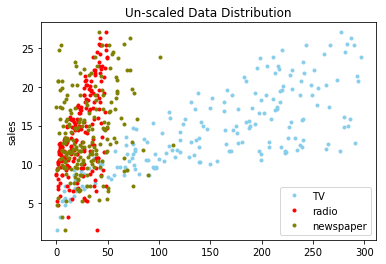

In [14]:
plt.plot( 'TV', 'sales', data=data, color='skyblue', label="TV",linestyle='None',marker = ".")
plt.plot( 'radio', 'sales', data=data,color='red', label="radio",linestyle='None',marker = ".")
plt.plot( 'newspaper', 'sales', data=data, color='olive', label="newspaper",linestyle='None',marker = ".")
plt.title('Un-scaled Data Distribution')
plt.ylabel('sales')
plt.legend()


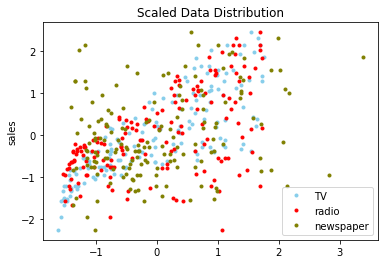

In [15]:
scaled_data = pd.DataFrame()
scaled_data[features] = x_scaled_train[features]
scaled_data[result] = y_scaled_train
plt.plot( 'TV', 'sales', data=scaled_data, color='skyblue', label="TV",linestyle='None',marker = ".")
plt.plot( 'radio', 'sales', data=scaled_data,color='red', label="radio",linestyle='None',marker = ".")
plt.plot( 'newspaper', 'sales', data=scaled_data, color='olive', label="newspaper",linestyle='None',marker = ".")
plt.ylabel('sales')
plt.title('Scaled Data Distribution')
plt.legend()

Notice how Evenly the points are spread out After Scaling

## Step 8: Applying Linear Regression Algorithm on train data and obtaining the model
This is achieved by using *LinearRegression* package in *sklearn.linear_model* packagetolist

### Obtaining the Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(x_scaled_train,y_scaled_train)

The following model is achieved

In [17]:
feature_col = ['Intercept']
feature_col.extend(features)
model = linreg.coef_.flatten().tolist()
model.insert(0, linreg.intercept_.tolist()[0])

eq1 = zip(feature_col, model)
for c1,c2 in eq1:
    print("{} = {}".format(c1,c2))

Intercept = -3.3034193620786576e-16
TV = 0.7601516569798964
radio = 0.5038000476821382
newspaper = 0.010094807092805747


### Applying the Model on test data

In [18]:
y_pred_train = result_scaler.inverse_transform(linreg.predict(x_scaled_train)).flatten()
y_pred_test = result_scaler.inverse_transform(linreg.predict(x_scaled_test)).flatten()

## Step 9: Evaluating the model

In [19]:
pred_data = x_test[features]
pred_data[result] = y_pred_test.tolist()

In [20]:
pred_data = pd.DataFrame(scaler.inverse_transform(pred_data))
pred_data.columns = ['TV','radio','newspaper','sales']
pred_data.head()

,TV,radio,newspaper,sales
0,4460.288857,1072.384584,822.284951,486.768346
1,4285.849617,498.626602,694.082618,375.824273
2,2041.257953,59.375986,185.476642,190.939571
3,5918.853104,242.221936,479.711504,405.985217
4,5364.010221,477.609826,660.455777,422.489269


In [21]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))

In [22]:
print("The irreducable Error, for train data Obtained through this model is {}".format(RMSE_train.round(2)))
print("The irreducable Error, for test data Obtained through this model is {}".format(RMSE_test.round(2)))

The irreducable Error, for train data Obtained through this model is 1.74
The irreducable Error, for test data Obtained through this model is 1.41


In [23]:
r2_sq_train = metrics.r2_score(y_train,y_pred_train)
r2_sq_test = metrics.r2_score(y_test,y_pred_test)

In [24]:
print("{}% of the variance in error of train data is covered in this model".format(r2_sq_train.round(4)*100))
print("{}% of the variance in error of test data is covered in this model".format(r2_sq_test.round(4)*100))

89.59% of the variance in error of train data is covered in this model
89.28% of the variance in error of test data is covered in this model
